# Data Pre-Processing

In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [3]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [4]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min = 0)
        y_pred = self.linear2(h_relu)
        return y_pred

In [5]:
x_list = []
loss_list = []

 - torch.utils.data.TensorDataset() : Dataset wrapping tensors.
 - torch.utils.data.DataLoader(dataset, batchsize) : Data loader. Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset. 

In [6]:
loader = DataLoader(TensorDataset(x, y), batch_size = 8)
model = TwoLayerNet(D_in, H, D_out)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(20):
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print("[*] epoch : ", epoch, " loss : ", loss.item())
    x_list.append(epoch)
    loss_list.append(loss.item())

[*] epoch :  0  loss :  1.1286710500717163
[*] epoch :  1  loss :  1.037499189376831
[*] epoch :  2  loss :  0.9596284627914429
[*] epoch :  3  loss :  0.8920494318008423
[*] epoch :  4  loss :  0.8312233090400696
[*] epoch :  5  loss :  0.7753127813339233
[*] epoch :  6  loss :  0.7239062190055847
[*] epoch :  7  loss :  0.6766200065612793
[*] epoch :  8  loss :  0.631830096244812
[*] epoch :  9  loss :  0.5901836156845093
[*] epoch :  10  loss :  0.5518006086349487
[*] epoch :  11  loss :  0.5160019993782043
[*] epoch :  12  loss :  0.48300701379776
[*] epoch :  13  loss :  0.4517921805381775
[*] epoch :  14  loss :  0.4222900867462158
[*] epoch :  15  loss :  0.3946676552295685
[*] epoch :  16  loss :  0.3684128224849701
[*] epoch :  17  loss :  0.3432537019252777
[*] epoch :  18  loss :  0.3195236921310425
[*] epoch :  19  loss :  0.2965633273124695


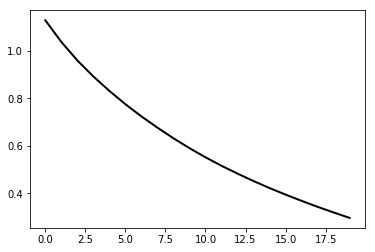

In [7]:
plt.plot(x_list, loss_list, "k-", linewidth=2, label="loss")
plt.show()